# P-value
p-값(p-value)은 귀무 가설(null hypothesis)이 맞다는 전데 하에, 표본에서 실제로 관측된 통계치와 '같거나 더 극단적인' 통계치가 관측될 확률이다. 여기서 말하는 확률은 '빈도주의' (frequentist) 확률이다. p-값(p-value)는 관찰된 데이터가 귀무가설과 양립하는 정도를 0에서 1 사이의 수치로 표현한 것이다. p-value가 작을수록 그 정도가 약하다고 보며, 특정 값(대개 0.05나 0.01 등) 보다 작을 경우 귀무가설을 기각하는 것이 관례이나 여기에는 여러 가지 문제들이 있다.

# 귀무가설
통계학에서 주장하는 바, 차이가 없거나 의미있는 차이가 없는 경우의 가설이며 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설이다.

# Kolmogorov-Smirnov 테스트
통계에서 KS 테스트는 표본을 기존 확률 분포와 비교하거나 두 표본을 비교하는 데 사용할 수 있는 연속형, 1차원확률 분포의 동등성에 대한 비모수 테스트입니다.

본질적으로 이 테스트는 "이 샘플 모음이 확률 분포에서 도출될 확률은 얼마입니까?" 또는 두번째 경우에는 "이 두 세트의 샘플이 동일한 (그러나 알려지지 않은) 확률 분포에서 추출되었을 확률은 얼마입니까?

kolmogorov-smirnov 통계량은 표본의 경험적 분포 함수와 기본 분포의 누적 분포 함수 사이 또는 두 표본의 경험적 분포 함수 사이의 거리를 정량화합니다. 이 통계량의 귀무 분포는 표본이 기존 분포에서 추출되거나(1 표본의 경우) 표본이 동일한 분포에서 추출된다는 귀무 가설(2 표본의 경우)에 따라 계산됩니다.


# Wilcoxon 테스트
Wilcoxon 부호 순위 검정은 데이터 표본을 기반으로 모집단의 위치를 테스트하거나 일치하는 두 표본을 사용하여 두 모집단의 위치를 비교하는 데 사용되는 비모수통계적 가설 검정입니다. 예를 들어, 모집단의 중위수가 0이 아닌지 또는 한 모집단의 표본이 다른 모집단의 표본보다 클 확률이 50%보다 높은지 여부를 검정하려는 경우입니다.

# statistical test
* 파이썬을 이용해 통계 검정하는 법을 알아보자
---

# T-test
* 두 그룹 간 차이가 통계적으로 유의미한지 알아보는 용도로 이용

In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234) #seed 설정을 하면 반복 작업시에도 일정한 결과를 보장

In [ ]:
# raw = pd.read_csv('./raw.csv', index_col = 0)

In [5]:
data = [['hsa.mir.129.2',4.498141,2.980395],['hsa.mir.141',1817.053667,1768.521568],
        ['hsa.mir.142',1836.309644,1726.754867],['hsa.mir.146a',139.059422,106.530555],
        ['hsa.mir.182',10599.129245,10296.246799]]
df = pd.DataFrame(data,columns=['index','unifocal','multifocal'])

In [9]:
raw = df
raw.head() #해당 데이터를 이용함

,index,unifocal,multifocal
0,hsa.mir.129.2,4.498141,2.980395
1,hsa.mir.141,1817.053667,1768.521568
2,hsa.mir.142,1836.309644,1726.754867
3,hsa.mir.146a,139.059422,106.530555
4,hsa.mir.182,10599.129245,10296.246799


In [10]:
#Kolmogorov-Smirnov 검정. 두 표본이 같은 분포를 따르는지 확인. p > 0.05 이므로 서로 다른 분포를 따름
stats.ks_2samp(raw['unifocal'], raw['multifocal'])

KstestResult(statistic=0.4, pvalue=0.873015873015873)

In [11]:
#wilcoxon 검정. 두 그룹 간 차이가 유의미한지 확인하는 비모수적 검정. p < 0.05 이므로 서로 유의미한 차이 있음
stats.wilcoxon(raw['unifocal'], raw['multifocal'])

WilcoxonResult(statistic=0.0, pvalue=0.0625)

---
# ex)iris data를 이용한 t-test
* iris setosa와 versicolor 간의 비교
* feature: sepal/petal length, sepal/petal width
* 각 feature가 종 간에 유의미하게 다른 분포를 가지는지 t-test 통해 확인
---

In [12]:
from sklearn.datasets import load_iris #iris dataset import
d = load_iris()

In [13]:
df_iris = pd.DataFrame(data=d.data, columns=d.feature_names)
df_iris['species'] = [d.target_names[x] for x in d.target]

In [14]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris_sl = df_iris['sepal length (cm)'].groupby(df_iris['species'])
iris_sw = df_iris['sepal width (cm)'].groupby(df_iris['species'])
iris_pl = df_iris['petal length (cm)'].groupby(df_iris['species'])
iris_pw = df_iris['petal width (cm)'].groupby(df_iris['species'])

In [16]:
setosa_sl     = iris_sl.apply(lambda x:list(x))[0]
versicolor_sl = iris_sl.apply(lambda x:list(x))[1]

setosa_sw     = iris_sw.apply(lambda x:list(x))[0]
versicolor_sw = iris_sw.apply(lambda x:list(x))[1]

setosa_pl     = iris_pl.apply(lambda x:list(x))[0]
versicolor_pl = iris_pl.apply(lambda x:list(x))[1]

setosa_pw     = iris_pw.apply(lambda x:list(x))[0]
versicolor_pw = iris_pw.apply(lambda x:list(x))[1]

In [17]:
#t-test. 두 그룹 간 차이가 유의미한지 확인하는 검정. p < 0.05 이면 서로 유의미한 차이 있음
print(stats.ttest_ind(setosa_sl, versicolor_sl))
print(stats.ttest_ind(setosa_sw, versicolor_sw))
print(stats.ttest_ind(setosa_pl, versicolor_pl))
print(stats.ttest_ind(setosa_pw, versicolor_pw))

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)
Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15)
Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)
Ttest_indResult(statistic=-34.08034154357719, pvalue=3.831095388248162e-56)


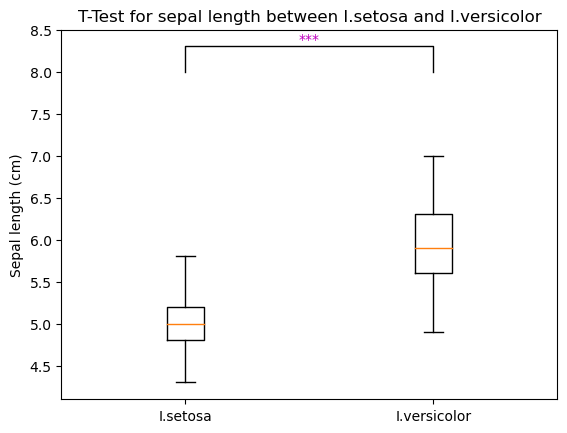

In [18]:
#boxplot으로 시각화하기
plt.boxplot([setosa_sl, versicolor_sl])
t, p = stats.ttest_ind(setosa_sl, versicolor_sl)

#star mark 표시하기
if(p<0.05 and p>=0.01):
    sig = '*'
elif(p<0.01 and p>=0.001):
    sig = '**'
elif(p<0.001):
    sig = '***'
else:
    sig = 'ns'
    
x1, x2 = 1,2   
y, h = np.max([setosa_sl, versicolor_sl]) + 1, 0.3

#선 그리기. x,y 좌표에 따라 선을 그림. (x1,y) > (x1,y+h)... lw: 선 굵기, c: color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')

#글 적기. 좌표 지정 후 내용, 좌우정렬, 수직정렬, 색상 순
plt.text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color='m')

plt.xticks([1,2],['I.setosa','I.versicolor'])
plt.ylabel('Sepal length (cm)')
plt.title('T-Test for sepal length between I.setosa and I.versicolor')
plt.show()